In [27]:
import pandas as pd #
import numpy as np #
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso

In [28]:
filepath='cleaned_data.csv'
data=pd.read_csv(filepath,infer_datetime_format=True)

In [29]:
data.head()

,Unnamed: 0,Status,ZipCode,City,Price,Days_on_market,Beds,Baths,Sqft,Date,Acres,Lot_sqft,Liv_index
0,0,A,98001,Auburn,725000,4.0,3.0,0.00,3060,2021-05-26,0.227,9894.0,68.0
1,1,A,98001,Auburn,300000,4.0,2.0,1.00,920,2021-05-26,0.164,7150.0,68.0
2,2,S,98001,Auburn,555000,3.0,2.0,1.00,1196,2021-05-07,0.544,23689.0,68.0
3,3,A,98001,Auburn,1300000,220.0,4.0,1.75,2850,2020-10-22,6.000,261360.0,68.0
4,4,S,98001,Auburn,250000,46.0,2.0,1.50,1200,2021-05-20,0.220,9600.0,68.0


In [30]:
clean=data.copy()
clean.drop(columns=['Unnamed: 0','Status','City','Days_on_market','Date'], inplace=True)
clean.head()

,ZipCode,Price,Beds,Baths,Sqft,Acres,Lot_sqft,Liv_index
0,98001,725000,3.0,0.00,3060,0.227,9894.0,68.0
1,98001,300000,2.0,1.00,920,0.164,7150.0,68.0
2,98001,555000,2.0,1.00,1196,0.544,23689.0,68.0
3,98001,1300000,4.0,1.75,2850,6.000,261360.0,68.0
4,98001,250000,2.0,1.50,1200,0.220,9600.0,68.0


In [31]:
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(clean),columns = clean.columns)

In [32]:
df_scaled.head()

,ZipCode,Price,Beds,Baths,Sqft,Acres,Lot_sqft,Liv_index
0,-1.555306,-0.363496,-0.475833,-2.561712,0.555529,-0.120425,-0.120375,-0.3604
1,-1.555306,-0.709294,-1.434467,-1.490792,-1.129448,-0.143231,-0.143178,-0.3604
2,-1.555306,-0.501816,-1.434467,-1.490792,-0.912133,-0.005675,-0.005737,-0.3604
3,-1.555306,0.104348,0.482800,-0.687602,0.390180,1.969342,1.969339,-0.3604
4,-1.555306,-0.749976,-1.434467,-0.955332,-0.908983,-0.122959,-0.122818,-0.3604


### Based on the try_2 notebook feature selection , we can reduce the no of features for the next iteration model to only the selected features

### Columns considered are ZipCode, Beds, Baths, Sqft, Acres, Liv_index, Lot_sqft

In [33]:
X=df_scaled.copy()
X=X.drop(columns=['Price'])

In [34]:
X.shape

(4128, 7)

In [35]:
X.head()

,ZipCode,Beds,Baths,Sqft,Acres,Lot_sqft,Liv_index
0,-1.555306,-0.475833,-2.561712,0.555529,-0.120425,-0.120375,-0.3604
1,-1.555306,-1.434467,-1.490792,-1.129448,-0.143231,-0.143178,-0.3604
2,-1.555306,-1.434467,-1.490792,-0.912133,-0.005675,-0.005737,-0.3604
3,-1.555306,0.482800,-0.687602,0.390180,1.969342,1.969339,-0.3604
4,-1.555306,-1.434467,-0.955332,-0.908983,-0.122959,-0.122818,-0.3604


In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ZipCode    4128 non-null   float64
 1   Beds       4128 non-null   float64
 2   Baths      4128 non-null   float64
 3   Sqft       4128 non-null   float64
 4   Acres      4128 non-null   float64
 5   Lot_sqft   4128 non-null   float64
 6   Liv_index  4128 non-null   float64
dtypes: float64(7)
memory usage: 225.9 KB


In [37]:
y=df_scaled['Price']

In [38]:
y.shape

(4128,)

In [39]:
y[1]

-0.7092943783028733

In [40]:
# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor


In [41]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [42]:
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [43]:
accuracy=model.score(X_test,y_test)
print(f'Linear Regression accuracy: {accuracy*100}')
print('coefficients :',model.coef_)
print('intercept :',model.intercept_)

Linear Regression accuracy: 55.224098494751985
coefficients : [ 0.07954959 -0.2309454   0.08678226  0.76902553 -8.84163042  8.85766389
  0.07268933]
intercept : 0.0049738308303530435


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

pred_vars = ['ZipCode','Beds','Baths','Sqft','Acres','Lot_sqft','Liv_index']
target_var = 'Price'
# X=df_scaled.copy()
# X=X.drop(columns=['Price'])
# y=df_scaled['Price']
X = df_scaled[pred_vars]
y = df_scaled[target_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)



In [45]:
X_train.shape

(3302, 7)

In [46]:
y_train.shape

(3302,)

In [48]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [49]:

y_pred = model.predict(X_test)


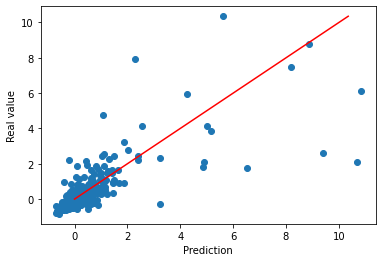

In [51]:
# Build a plot
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')
# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [58]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,mean_squared_error
print('MSE:',mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
# print('MSLE:\t%.5f' % mean_squared_log_error(y_test, y_pred))

MSE: 0.4174236296987122
MAE: 0.2386024354455469
